In [254]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [255]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [256]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/충남통합.csv',sep=',',encoding='cp949')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [257]:
df

,name,score,loc,lowest_price,category,loc2,SIG_CD
0,천안 뷰 호텔,4.8,83.9km,40000.0,m,천안 서북구,44133
1,천안 저스트슬립호텔 천안두정점,4.9,84.7km,50000.0,m,천안 서북구,44133
2,천안 샹그리라,4.8,85km,40000.0,m,천안 서북구,44133
3,천안 KNOX HOTEL,4.7,두정역 1번출구 도보 10분-85.1km,45000.0,m,천안 서북구,44133
4,천안 K2 호텔(게임PC),4.7,85.1km,50000.0,m,천안 서북구,44133
5,천안 브라운도트 천안 성정점,4.8,"조식,배그,VR게임,넷플릭스-85.3km",50000.0,m,천안 서북구,44133
6,천안 제우스,3.7,1호선 두정역 도보 10분-85.3km,30000.0,m,천안 서북구,44133
7,천안 넘버25 천안역점,4.7,천안역 도보 10분-86.8km,40000.0,m,천안 서북구,44133
8,천안 휴 호텔,4.6,86.8km,30000.0,m,천안 서북구,44133
9,천안 NU(엔유) 호텔,4.6,"라면무료,영화방,스타일러,위치확인-86.9km",30000.0,m,천안 서북구,44133


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1325 non-null   object 
 1   score         1325 non-null   float64
 2   loc           1325 non-null   object 
 3   lowest_price  1325 non-null   float64
 4   category      1325 non-null   object 
 5   loc2          1325 non-null   object 
 6   SIG_CD        1325 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 72.6+ KB


In [259]:
print('충남 숙박업소 개수 : ', len(df))
print('충남 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('충남 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('충남 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('충남 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

충남 숙박업소 개수 :  1325
충남 숙밥업소 모텔 개수 :  552
충남 숙밥업소 호텔 개수 :  53
충남 숙밥업소 팬션 개수 :  712
충남 숙밥업소 게스트하우스 개수 :  8


In [260]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
ptotal = (df['category']=='p').sum()
gtotal = (df['category']=='g').sum()

In [261]:
### sort
dfc1 = df.sort_values(by=['category'])

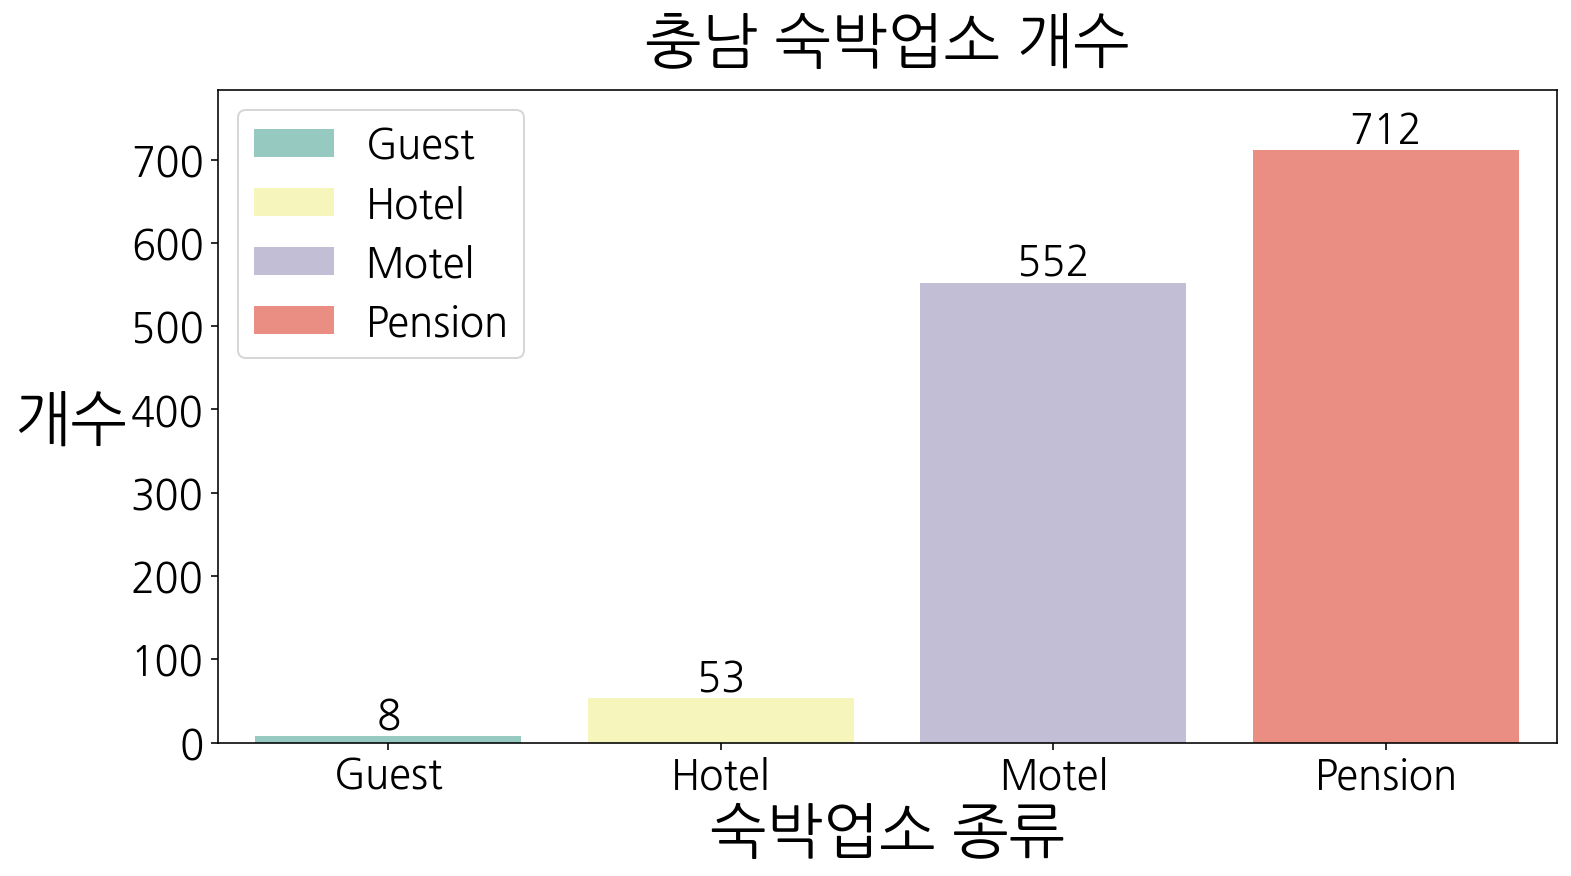

In [262]:
################### 충남 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('충남 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Guest','Hotel','Motel','Pension'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel','Pension'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(3,ptotal,ptotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.margins(0.03, 0.1)
#plt.show()
plt.savefig('충남 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [263]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)

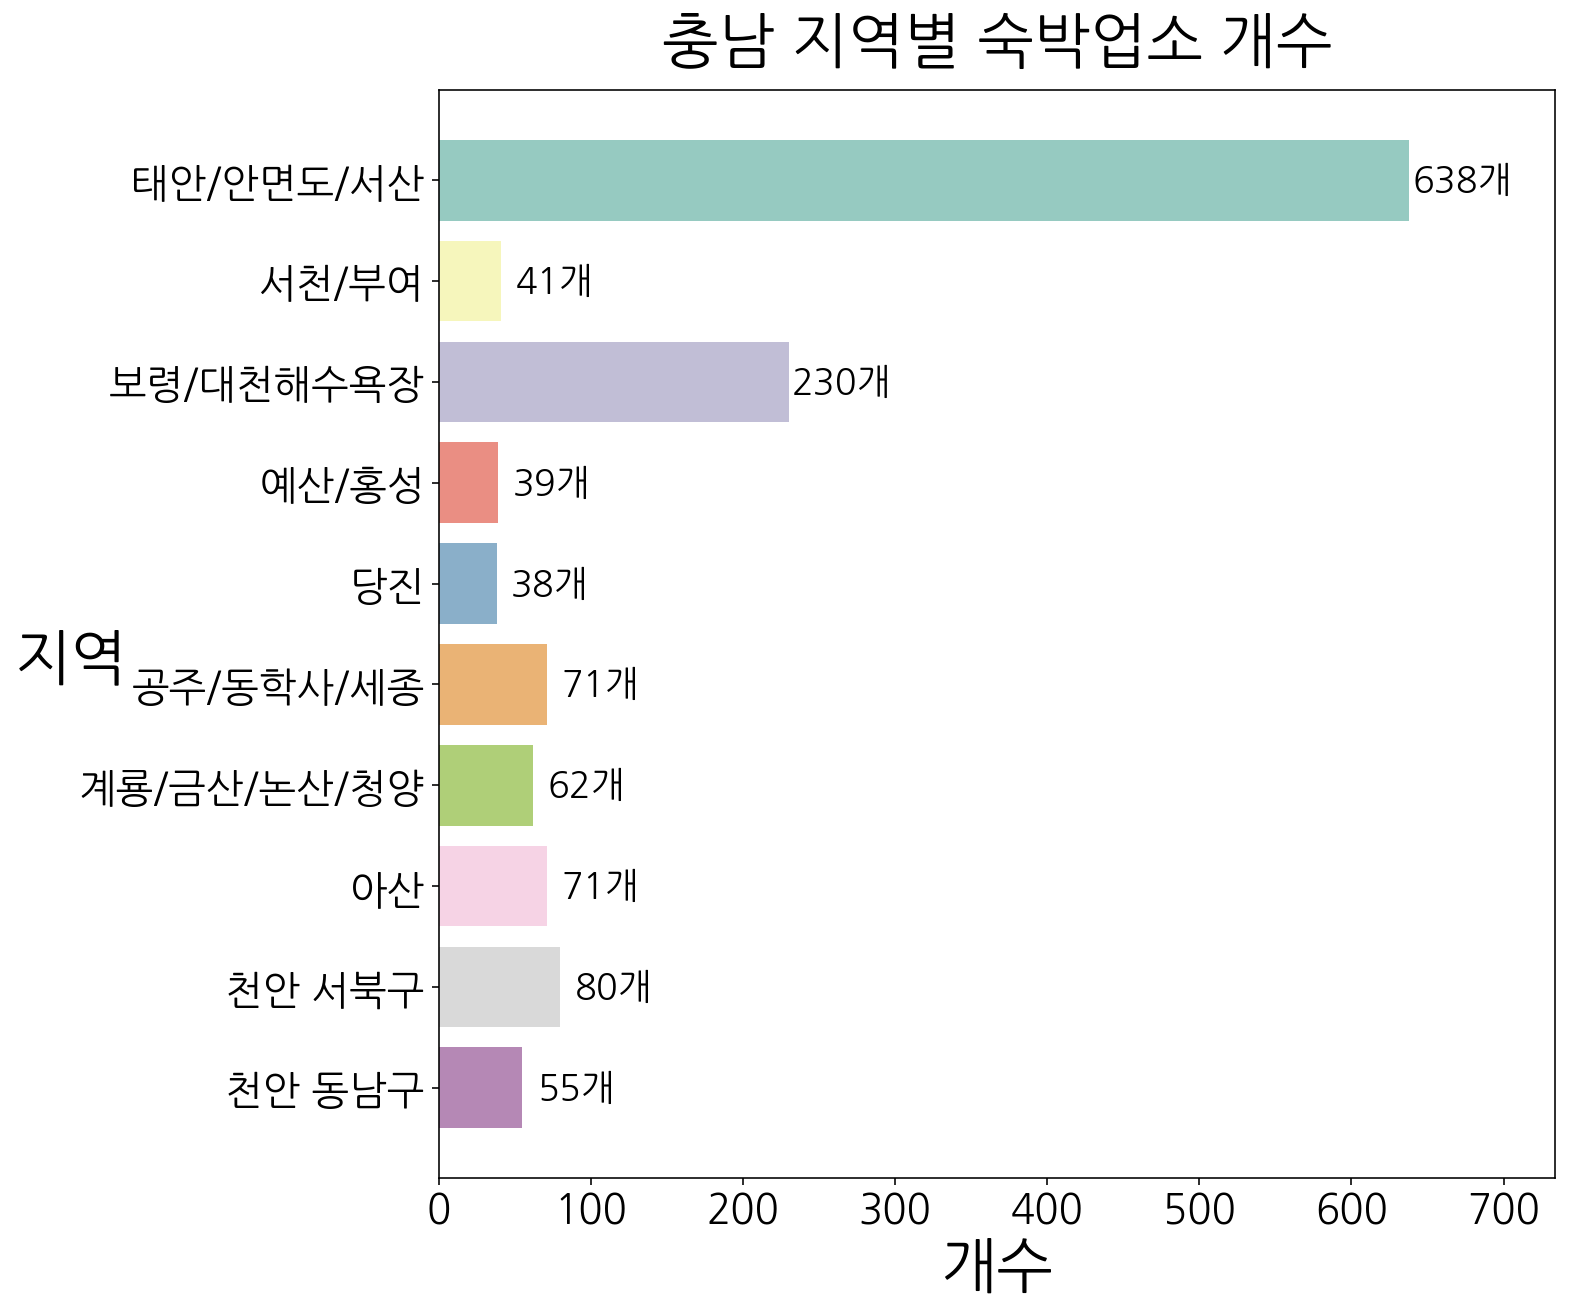

In [264]:
############## 충남 지역별 숙박업소 개수
ax = plt.figure(figsize=(10,10))
ax = sns.barplot(data = df2, x='count', y = 'loc2',palette='Set3')
ax.set_title('충남 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,position=(0,0.45,0))
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+35,p.get_y()-0.15), ha='center', va='top', color='black', size=18)
plt.margins(0.15,0.05)
#plt.show()
plt.savefig('충남 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

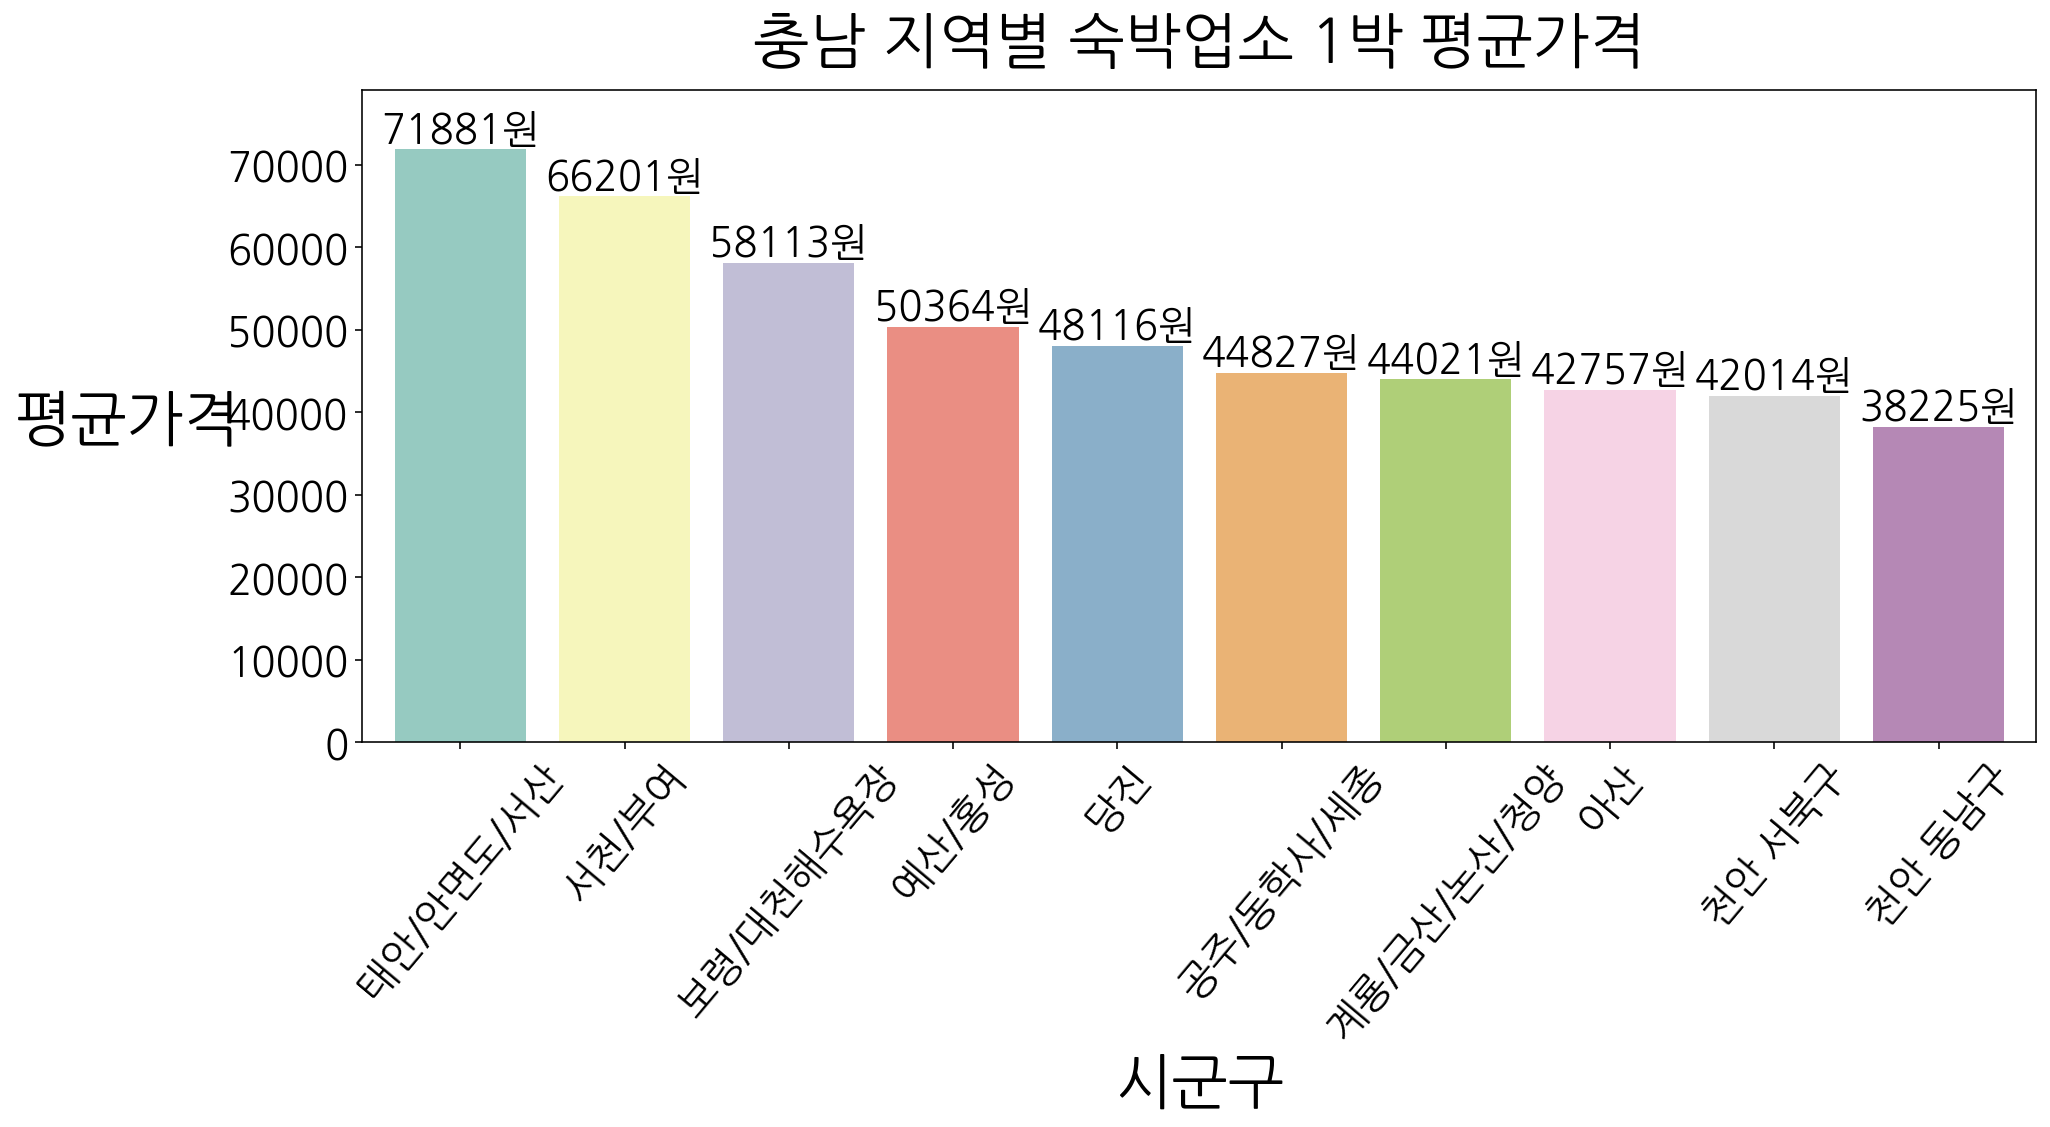

In [265]:
############## 충남 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(15,6))
ax = sns.barplot(data = df2, x='loc2', y = 'lowest_price',palette='Set3')
ax.set_title('충남 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=50,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=50)
plt.margins(0.02, 0.1)
#plt.show()
plt.savefig('충남 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [266]:
df2

,loc2,score,lowest_price,SIG_CD,count
0,태안/안면도/서산,4.211912,71880.871473,44825,638
1,서천/부여,4.375610,66201.268293,44760,41
2,보령/대천해수욕장,4.296957,58112.786957,44180,230
3,예산/홍성,4.292308,50363.743590,44800,39
4,당진,4.294737,48115.842105,44270,38
5,공주/동학사/세종,4.354930,44826.985915,44150,71
6,계룡/금산/논산/청양,4.191935,44020.548387,44230,62
7,아산,4.223944,42756.957746,44200,71
8,천안 서북구,4.560000,42014.375000,44133,80
9,천안 동남구,4.523636,38225.309091,44131,55


In [269]:
m = folium.Map(location=[36.3, 127.0],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([36.77274276609693, 126.40748745855201],tooltip = df2['loc2'][0]+' : '+str(int(df2['lowest_price'][0]))+'원').add_to(m)
folium.Marker([36.155204310645296, 126.81130923629105],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([36.32274906230321, 126.62818178508711],tooltip = df2['loc2'][2]+' : '+str(int(df2['lowest_price'][2]))+'원').add_to(m)
folium.Marker([36.64843720554471, 126.7360202588067],tooltip = df2['loc2'][3]+' : '+str(int(df2['lowest_price'][3]))+'원').add_to(m)
folium.Marker([36.897045052977624, 126.67613441181344],tooltip = df2['loc2'][4]+' : '+str(int(df2['lowest_price'][4]))+'원').add_to(m)
folium.Marker([36.52672701656629, 127.1996636164859],tooltip = df2['loc2'][5]+' : '+str(int(df2['lowest_price'][5]))+'원').add_to(m)
folium.Marker([36.21450704830848, 127.21737214183949],tooltip = df2['loc2'][6]+' : '+str(int(df2['lowest_price'][6]))+'원').add_to(m)
folium.Marker([36.80600763428689, 127.00917538884299],tooltip = df2['loc2'][7]+' : '+str(int(df2['lowest_price'][7]))+'원').add_to(m)
folium.Marker([36.89774752535264, 127.16186792783719],tooltip = df2['loc2'][8]+' : '+str(int(df2['lowest_price'][8]))+'원').add_to(m)
folium.Marker([36.76891380017845, 127.2315726655061],tooltip = df2['loc2'][9]+' : '+str(int(df2['lowest_price'][9]))+'원').add_to(m)
m

In [270]:
m.save('충남 숙밥업소 1박 평균가격.html')

In [274]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[36.3, 127.0],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([36.77274276609693, 126.40748745855201],tooltip = df2['loc2'][0]+' : '+str(int(df2['count'][0]))+'개').add_to(m)
folium.Marker([36.155204310645296, 126.81130923629105],tooltip = df2['loc2'][1]+' : '+str(int(df2['count'][1]))+'개').add_to(m)
folium.Marker([36.32274906230321, 126.62818178508711],tooltip = df2['loc2'][2]+' : '+str(int(df2['count'][2]))+'개').add_to(m)
folium.Marker([36.64843720554471, 126.7360202588067],tooltip = df2['loc2'][3]+' : '+str(int(df2['count'][3]))+'개').add_to(m)
folium.Marker([36.897045052977624, 126.67613441181344],tooltip = df2['loc2'][4]+' : '+str(int(df2['count'][4]))+'개').add_to(m)
folium.Marker([36.52672701656629, 127.1996636164859],tooltip = df2['loc2'][5]+' : '+str(int(df2['count'][5]))+'개').add_to(m)
folium.Marker([36.21450704830848, 127.21737214183949],tooltip = df2['loc2'][6]+' : '+str(int(df2['count'][6]))+'개').add_to(m)
folium.Marker([36.80600763428689, 127.00917538884299],tooltip = df2['loc2'][7]+' : '+str(int(df2['count'][7]))+'개').add_to(m)
folium.Marker([36.89774752535264, 127.16186792783719],tooltip = df2['loc2'][8]+' : '+str(int(df2['count'][8]))+'개').add_to(m)
folium.Marker([36.76891380017845, 127.2315726655061],tooltip = df2['loc2'][9]+' : '+str(int(df2['count'][9]))+'개').add_to(m)

m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [275]:
m.save('충남 숙밥업소 수.html')